In [4]:
# Importing all the libraries needed
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
import pandas as pd
import os, requests, cv2, random
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import models
from tensorflow.keras import Sequential, layers
#from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow import keras
from sklearn.metrics import confusion_matrix,classification_report

In [5]:
# loading the pictures of tomatoes

train_data_dir = '/kaggle/input/tomatoleaf/tomato/train'
test_data_dir = '/kaggle/input/tomatoleaf/tomato/val' #this folder will be used for evaluating model's perfomance

In [6]:
# for this challenge we are using ImageDataGenerator 

train_datagen = ImageDataGenerator(rescale=1/255.0,
                               shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                validation_split=0.3)# specifying the validation split inside the function

test_datagen = ImageDataGenerator(rescale=1/255.0,
                                shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True)

In [7]:
train_gen = train_datagen.flow_from_directory(
                                train_data_dir,
                                target_size=(224, 224),
                                batch_size=32,
                                shuffle=True,
                                class_mode='categorical',
                                subset='training')

Found 7000 images belonging to 10 classes.


In [8]:
val_gen = train_datagen.flow_from_directory(
                                train_data_dir,
                                target_size=(224,224),
                                batch_size=32,
                                shuffle=True,
                                class_mode='categorical',
                                subset='validation')

Found 3000 images belonging to 10 classes.


In [9]:
test_gen = test_datagen.flow_from_directory(
        test_data_dir,
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical',
        shuffle = False)

Found 1000 images belonging to 10 classes.


In [23]:
class_names = sorted(os.listdir(train_data_dir))
class_names

['Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']

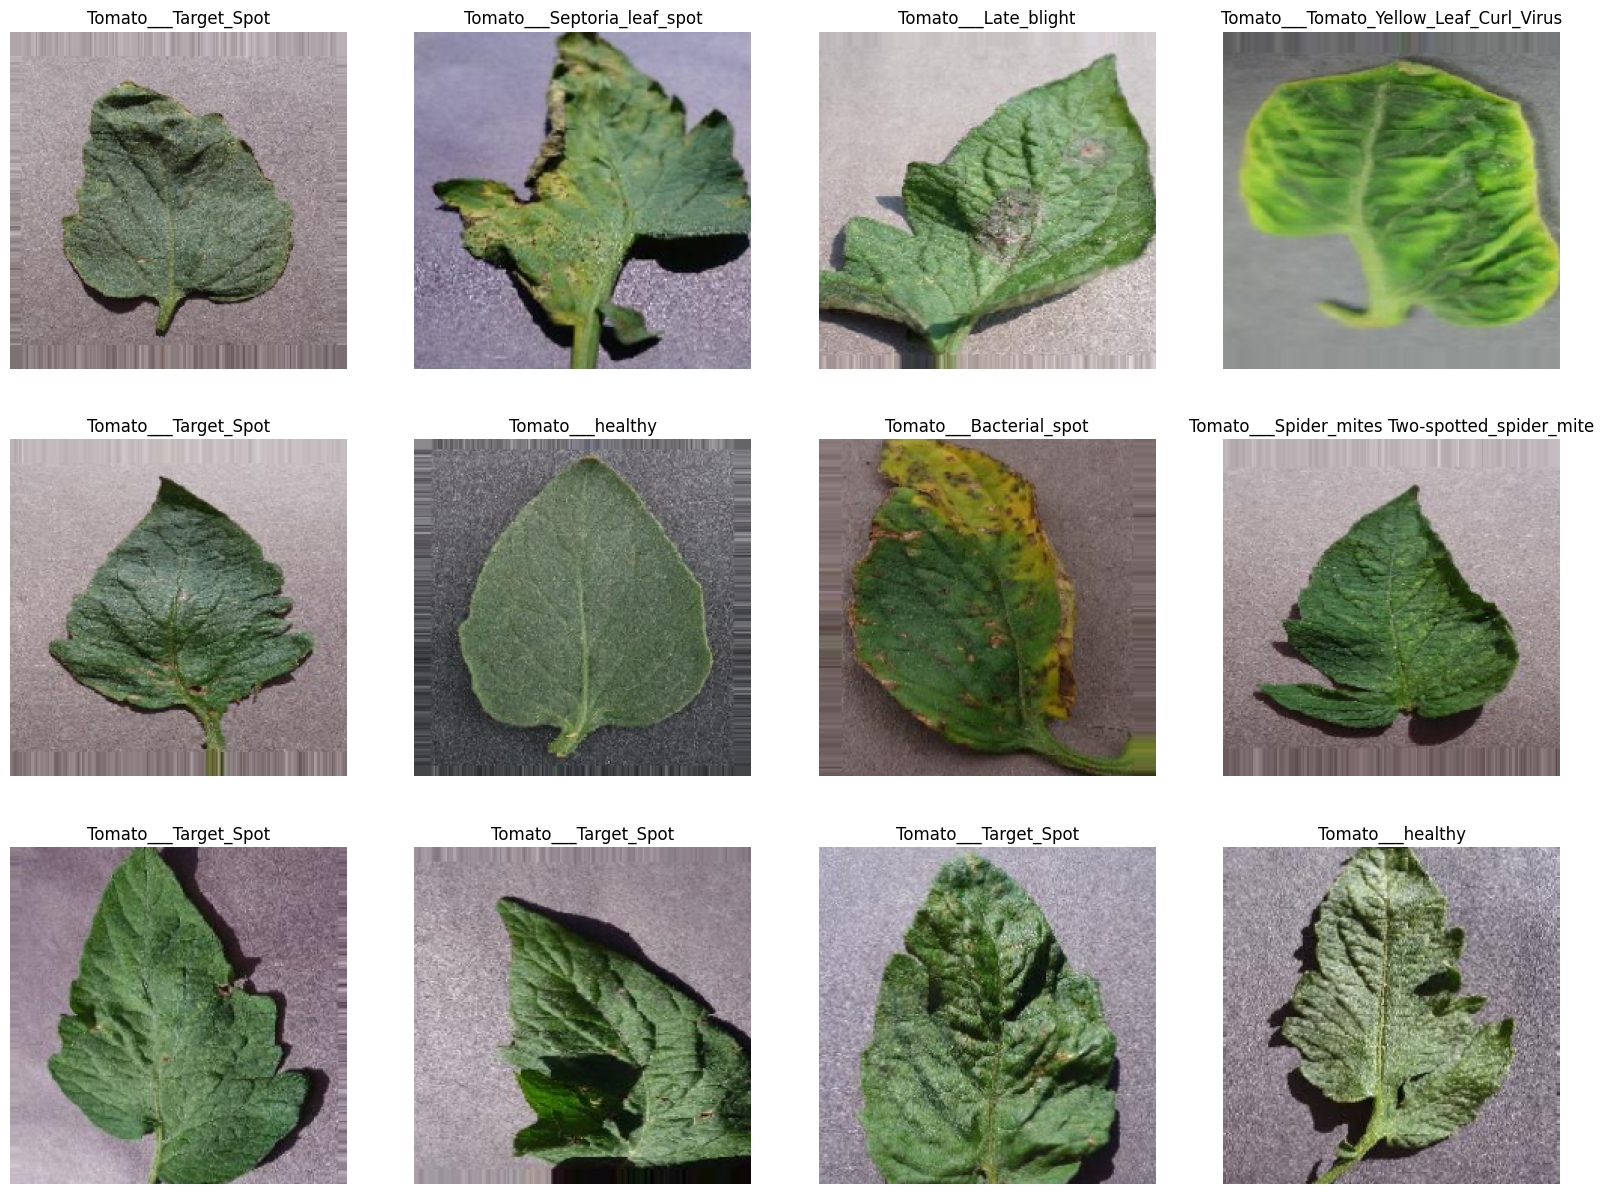

In [25]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

def plot_images(data, class_names):
    r, c = 3, 4
    imgLen = r * c

    plt.figure(figsize=(20, 15))
    i = 1

    for images, labels in iter(data):
        id = np.random.randint(len(images))
        img = tf.expand_dims(images[id], axis=0)
        lab = class_names[np.argmax(labels[id])]

        plt.subplot(r, c, i)
        plt.imshow(img[0])
        plt.title(lab)
        plt.axis('off')

        i += 1
        if i > imgLen:
            break
    plt.show()

# Asumsi `train_gen` dan `class_names` sudah didefinisikan
plot_images(train_gen, class_names)


In [10]:
# CNN model layers

cnn = models.Sequential()

cnn.add(layers.Conv2D (32, kernel_size = (3,3), activation='relu', input_shape = [224, 224,3])),
cnn.add(layers.MaxPooling2D(pool_size = (2, 2))),

cnn.add(layers.Conv2D(64, (3,3), activation='relu')),
cnn.add(layers. MaxPooling2D((2, 2))),

cnn.add(layers.Conv2D (64, (3,3), activation='relu')),
cnn.add(layers.MaxPooling2D((2, 2))),

cnn.add(layers.Conv2D(64, (3, 3), activation='relu')), 
cnn.add(layers.MaxPooling2D((2, 2))),

cnn.add(layers. Conv2D (64, (3, 3), activation='relu')), 
cnn.add(layers.MaxPooling2D((2, 2))),

cnn.add(layers.Conv2D(64, (3, 3), activation='relu')), 
cnn.add(layers.MaxPooling2D((2, 2))),

cnn.add(layers.Flatten()),

cnn.add(layers.Dense(64,activation='relu'))
#output layer
cnn.add(layers.Dense(10,activation='softmax'))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 10, 10, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 1, 1, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 171,914 (671.54 KB)

 Trainable params: 171,914 (671.54 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
opt = keras.optimizers.Adam(learning_rate=0.001)

In [13]:
cnn.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])

In [16]:
class myCallback(tf.keras.callbacks.Callback):
    
    def on_epoch_end(self, epoch, logs={}):
        acc = logs.get('accuracy')
        val_acc = logs.get('val_accuracy')
        if acc is not None and val_acc is not None and acc > 0.95 and val_acc > 0.95:
            self.model.stop_training = True
            
callbacks = myCallback()

In [26]:
import tensorflow as tf
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint

# Definisi callback ReduceLROnPlateau
rlp = ReduceLROnPlateau(monitor='val_accuracy', patience=2, verbose=1, factor=0.5, min_lr=0.00001)

# Definisi callback ModelCheckpoint
checkpoint_path = 'model_checkpoint.keras'  # Ganti ekstensi menjadi .keras
checkpoint = ModelCheckpoint(checkpoint_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

In [41]:
# history = cnn.fit(x = train_gen,
#                   callbacks = [rlp,checkpoint, callbacks],
#                   steps_per_epoch = 7000/32,
#                   epochs = 100,
#                   validation_steps = 3000/32,
#                   validation_data = val_gen)  

# Menghitung steps_per_epoch dan validation_steps
steps_per_epoch = train_gen.samples // train_gen.batch_size
validation_steps = val_gen.samples // val_gen.batch_size

# Melatih model dengan callback dan langkah per epoch yang ditentukan
history = cnn.fit(
    train_gen,
    epochs=100,
    validation_data=val_gen,
    steps_per_epoch=steps_per_epoch,
    validation_steps=validation_steps,
    callbacks=[callbacks, rlp, checkpoint]
)

Epoch 1/100
217/218 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step - accuracy: 0.9020 - loss: 0.2894
Epoch 1: val_accuracy did not improve from 0.95833
218/218 ━━━━━━━━━━━━━━━━━━━━ 122s 546ms/step - accuracy: 0.9020 - loss: 0.2895 - val_accuracy: 0.8743 - val_loss: 0.3482 - learning_rate: 1.0000e-05
Epoch 2/100
  1/218 ━━━━━━━━━━━━━━━━━━━━ 12s 57ms/step - accuracy: 0.8750 - loss: 0.3066
Epoch 2: val_accuracy did not improve from 0.95833
218/218 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8750 - loss: 0.3066 - val_accuracy: 0.7917 - val_loss: 0.9006 - learning_rate: 1.0000e-05
Epoch 3/100
217/218 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step - accuracy: 0.9054 - loss: 0.2774
Epoch 3: val_accuracy did not improve from 0.95833
218/218 ━━━━━━━━━━━━━━━━━━━━ 123s 551ms/step - accuracy: 0.9053 - loss: 0.2775 - val_accuracy: 0.8740 - val_loss: 0.3458 - learning_rate: 1.0000e-05
Epoch 4/100
  1/218 ━━━━━━━━━━━━━━━━━━━━ 11s 54ms/step - accuracy: 0.9375 - loss: 0.1791
Epoch 4: val_accuracy did not improve from 0.958

In [45]:
# Evaluasi model pada data test
test_loss, test_accuracy = cnn.evaluate(test_gen, steps=test_gen.samples // test_gen.batch_size)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

31/31 ━━━━━━━━━━━━━━━━━━━━ 12s 373ms/step - accuracy: 0.8734 - loss: 0.3722
Test Loss: 0.3664843440055847
Test Accuracy: 0.8830645084381104


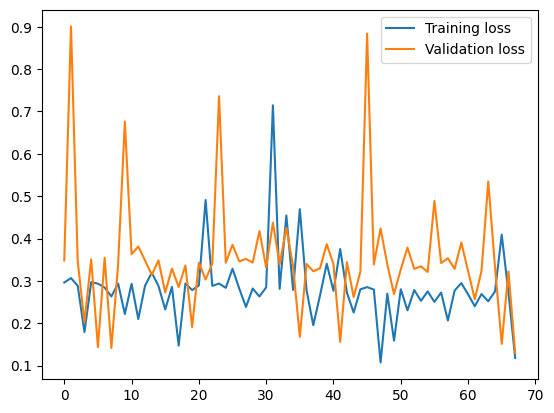

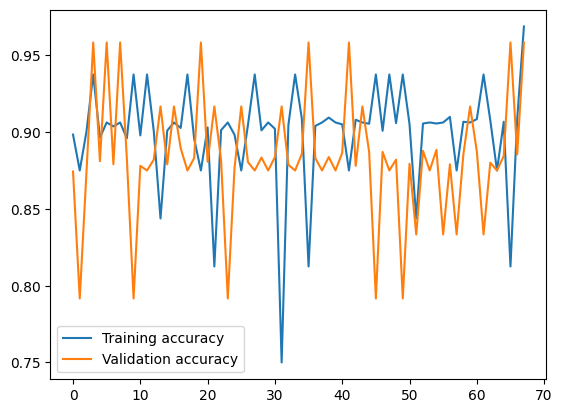

In [46]:
# plot the loss
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()
plt.show()

# plot the accuracy
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


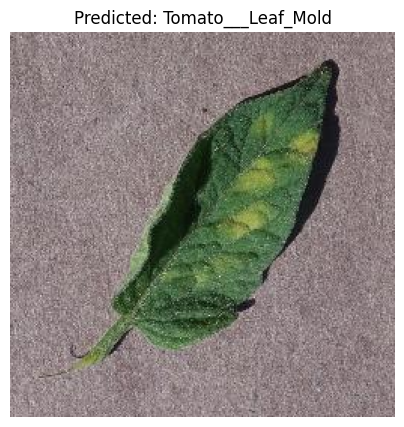

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Fungsi untuk memuat dan mempersiapkan gambar untuk prediksi
def prepare_image(file_path, target_size=(224, 224)):
    img = load_img(file_path, target_size=target_size)
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Tambahkan batch dimension
    img_array /= 255.0  # Normalisasi
    return img_array

# Fungsi untuk melakukan prediksi dan menampilkan hasilnya
def predict_and_show(model, file_path, class_labels):
    img_array = prepare_image(file_path)
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction, axis=1)[0]
    predicted_label = class_labels[predicted_class]
    
    plt.figure(figsize=(5, 5))
    plt.imshow(load_img(file_path))
    plt.title(f'Predicted: {predicted_label}')
    plt.axis('off')
    plt.show()

# Contoh penggunaan fungsi di atas untuk gambar dari data uji
test_image_path = '/kaggle/input/tomatoleaf/tomato/train/Tomato___Leaf_Mold/092442ed-3ad2-4195-8cd5-cc2ba74469e1___Crnl_L.Mold 6578.JPG'  # Ganti dengan path gambar uji Anda
predict_and_show(cnn, test_image_path, class_names)


In [48]:
cnn.save("tomatodisease.h5")